In [17]:
import copy
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import os

from torch.utils.data import Dataset
from transformers import pipeline
from transformers import GPT2Tokenizer
from transformers import GPT2ForSequenceClassification

from sklearn.model_selection import train_test_split
from sklearn import metrics
from datasets import Dataset

In [18]:
if torch.cuda.is_available():
    device = torch.device('cude')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

In [19]:
from visualize_attention_heatmap import plot_head0_heatmap as plot_heatmap

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

# Adds the tokenizer to the model.
# tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
# tokenizer.save_pretrained('model')

main_model = GPT2ForSequenceClassification.from_pretrained("./model")

sm = nn.Softmax()

mapping = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}

In [20]:
def pass_text_to_model(inputs, model):

    ## collect prob vectors
    with torch.no_grad():
        logits = model(**inputs).logits
    softmax_probs = sm(logits)
    return softmax_probs

def token_analysis(text_1, text_2):
    inputs_1 = tokenizer(text_1, return_tensors = 'pt')
    inputs_2 = tokenizer(text_2, return_tensors = 'pt')

    probability_vector_1 = pass_text_to_model(inputs_1, main_model)
    probability_vector_2 = pass_text_to_model(inputs_2, main_model)

    print(probability_vector_1, f"Label = {np.argmax(probability_vector_1.tolist()[0])}")
    print(probability_vector_2, f"Label = {np.argmax(probability_vector_2.tolist()[0])}")
    plot_heatmap(text_1, text_2, "./model_with_tokenizer")

/opt/homebrew/anaconda3/envs/CS6120/lib/python3.10/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([[1.8284e-04, 5.2902e-01, 4.7015e-01, 2.0965e-04, 2.2635e-04, 2.0780e-04]]) Label = 1
tensor([[1.7833e-04, 5.2947e-01, 4.6972e-01, 2.0615e-04, 2.2066e-04, 2.0531e-04]]) Label = 1


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


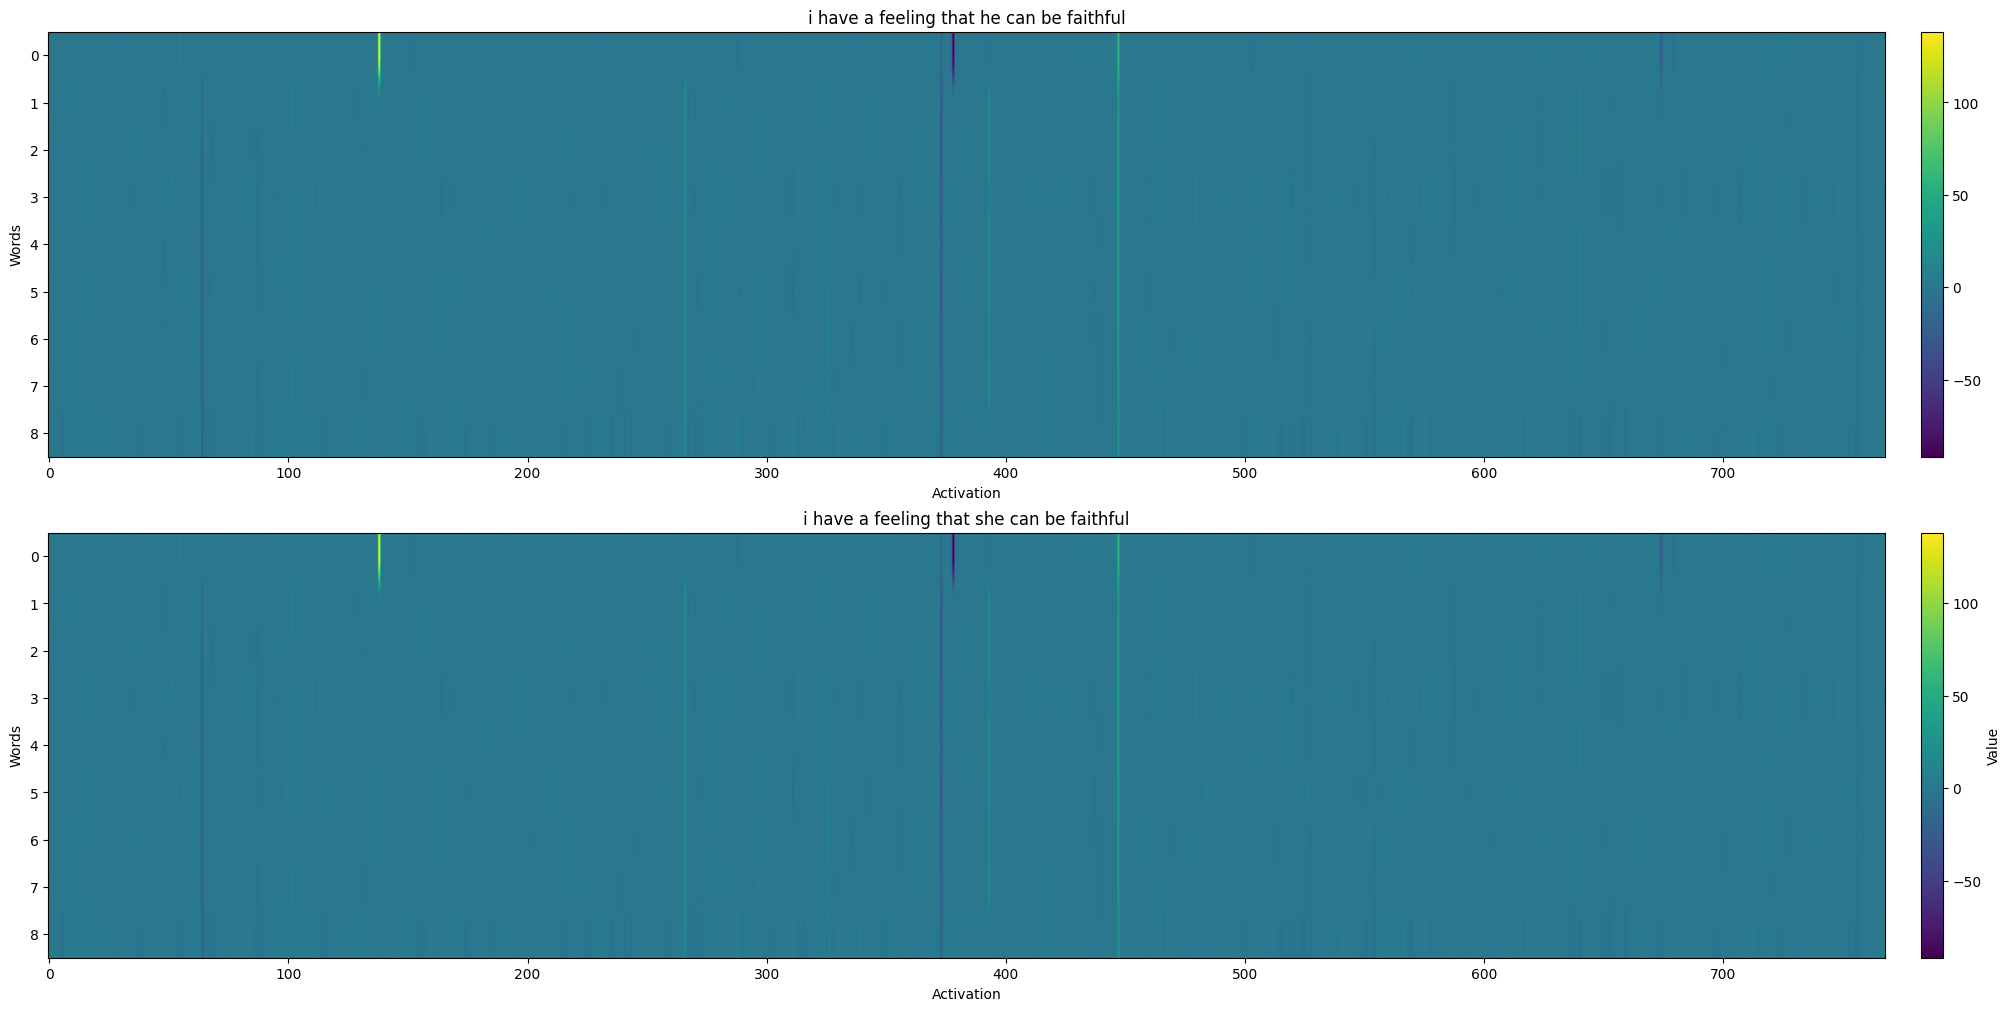

In [21]:
text_1 = "i have a feeling that he can be faithful" 
text_2 = "i have a feeling that she can be faithful"

token_analysis(text_1, text_2)

tensor([[7.6522e-08, 2.1759e-08, 1.2968e-07, 1.4575e-07, 1.0000e+00, 7.3943e-08]]) Label = 4
tensor([[7.4296e-08, 2.1628e-08, 1.3442e-07, 1.4481e-07, 1.0000e+00, 7.9695e-08]]) Label = 4


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


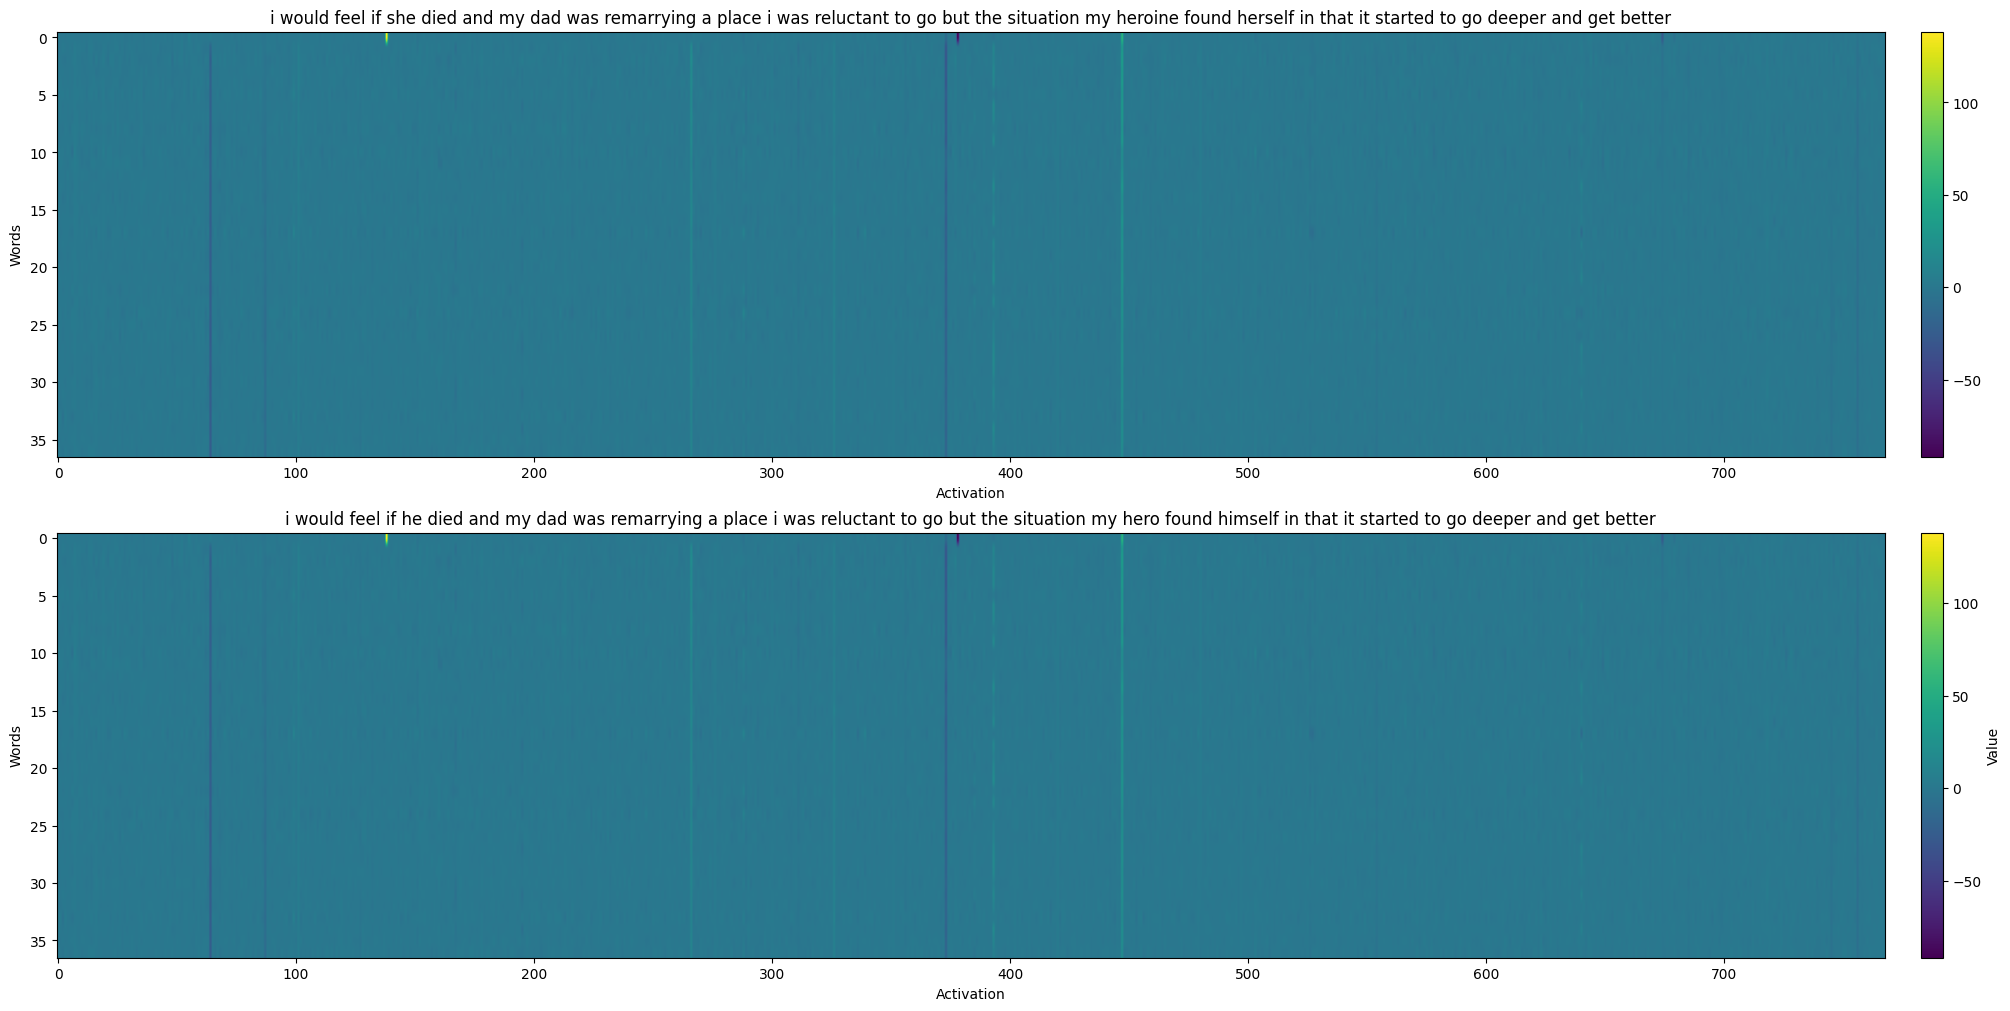

In [22]:
text_1 = "i would feel if she died and my dad was remarrying a place i was reluctant to go but the situation my heroine found herself in that it started to go deeper and get better" 
text_2 = "i would feel if he died and my dad was remarrying a place i was reluctant to go but the situation my hero found himself in that it started to go deeper and get better"

token_analysis(text_1, text_2)

tensor([[7.6522e-08, 2.1759e-08, 1.2968e-07, 1.4575e-07, 1.0000e+00, 7.3943e-08]]) Label = 4
tensor([[7.7876e-08, 2.3513e-08, 1.4079e-07, 1.5385e-07, 1.0000e+00, 7.3560e-08]]) Label = 4


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


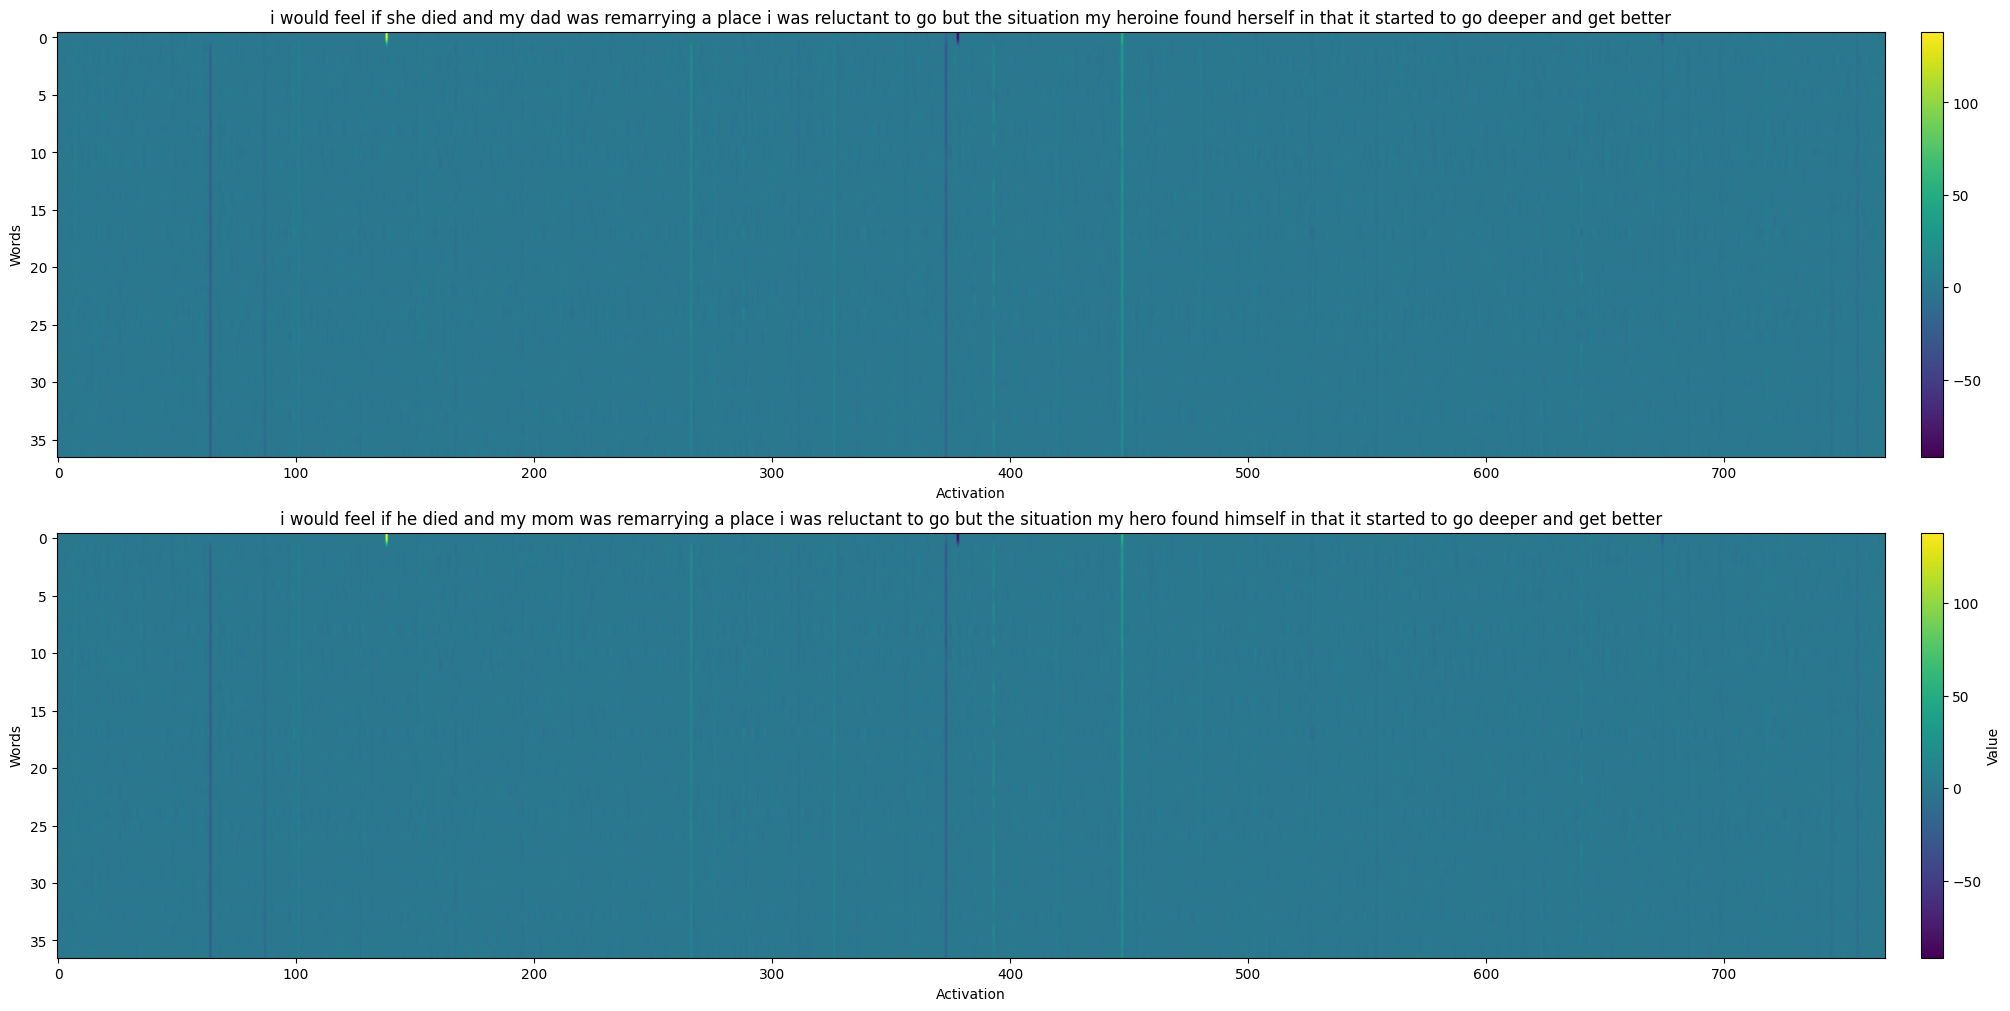

In [23]:
text_1 = "i would feel if she died and my dad was remarrying a place i was reluctant to go but the situation my heroine found herself in that it started to go deeper and get better" 
text_2 = "i would feel if he died and my mom was remarrying a place i was reluctant to go but the situation my hero found himself in that it started to go deeper and get better"

token_analysis(text_1, text_2)

tensor([[1.3846e-03, 2.7776e-05, 2.7723e-05, 3.7766e-01, 6.2035e-01, 5.5173e-04]]) Label = 4
tensor([[1.3868e-03, 2.8496e-05, 2.7915e-05, 3.7799e-01, 6.2001e-01, 5.5702e-04]]) Label = 4


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


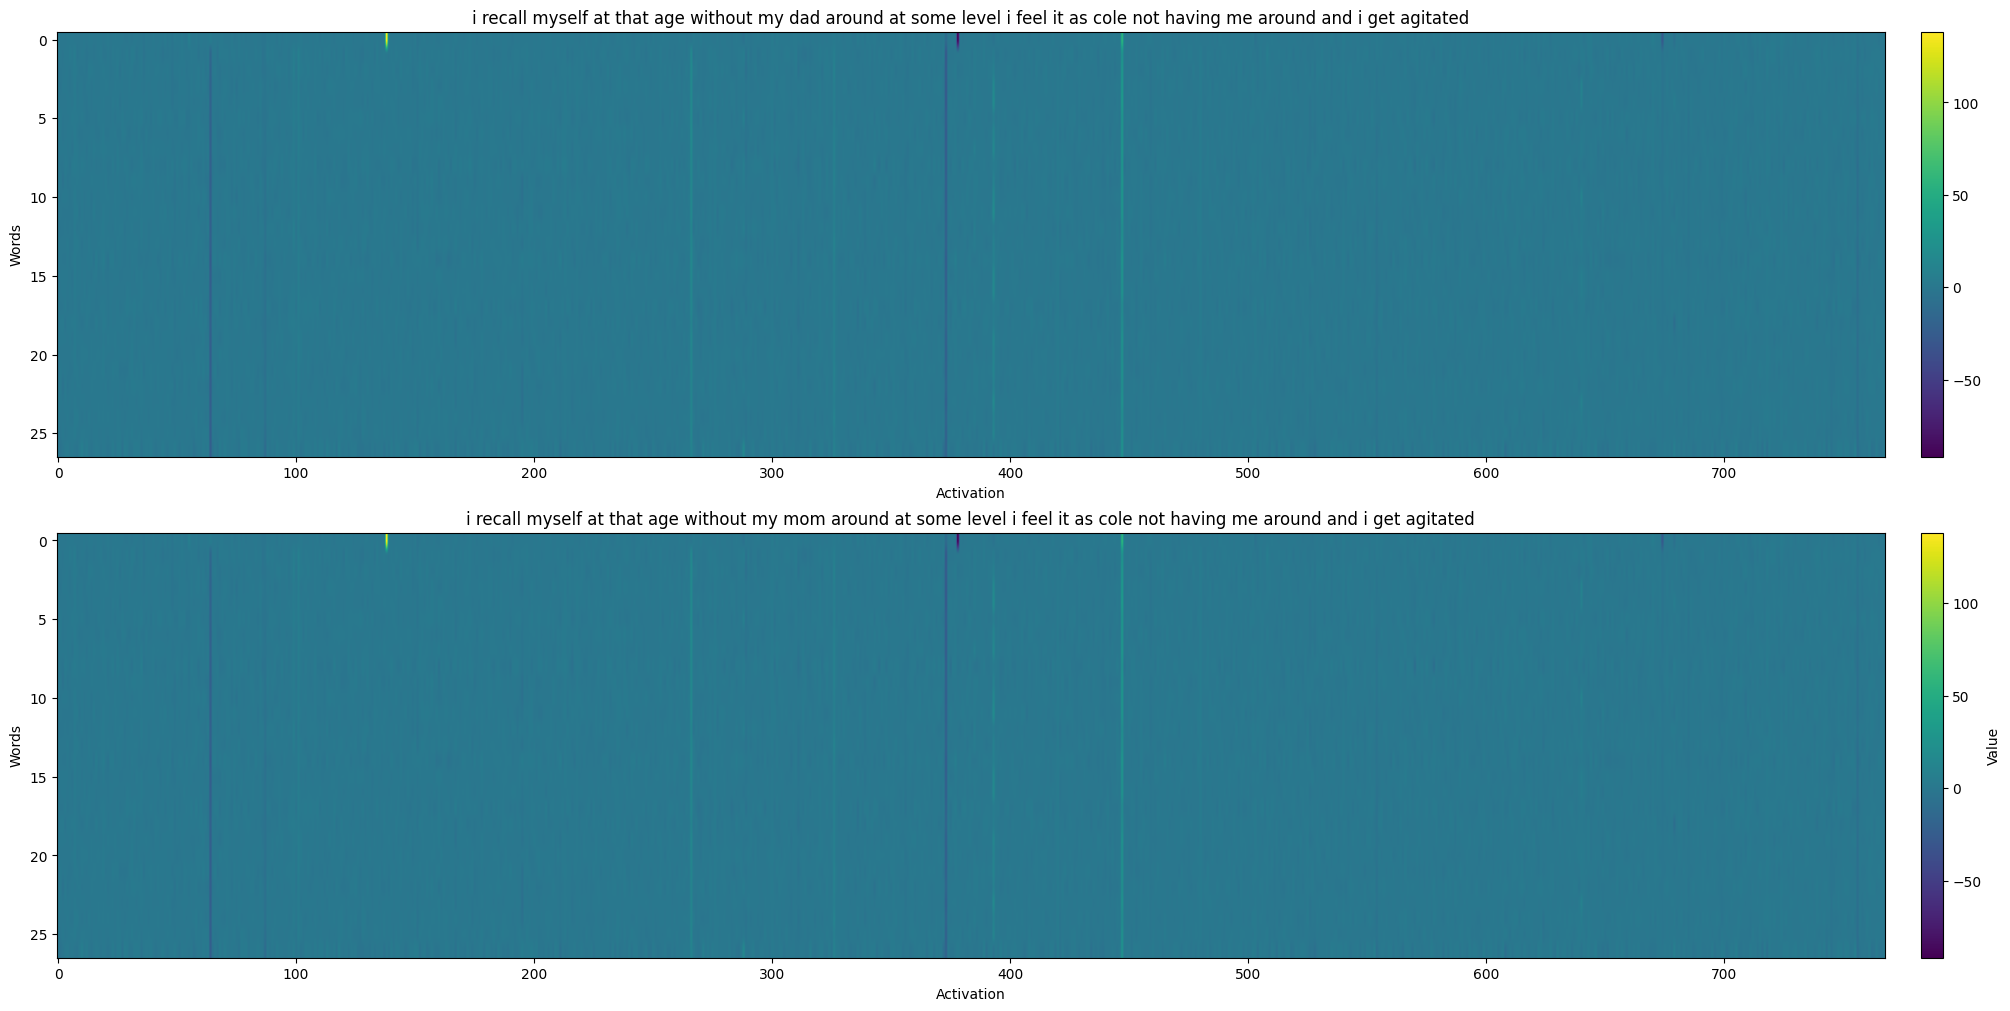

In [24]:
text_1 = "i recall myself at that age without my dad around at some level i feel it as cole not having me around and i get agitated"
text_2 = "i recall myself at that age without my mom around at some level i feel it as cole not having me around and i get agitated"

token_analysis(text_1, text_2)

tensor([[9.5760e-07, 6.9365e-08, 3.1845e-08, 1.0000e+00, 2.3433e-06, 1.8873e-08]]) Label = 3
tensor([[9.0712e-07, 9.8514e-08, 4.1822e-08, 1.0000e+00, 2.7741e-06, 2.1745e-08]]) Label = 3


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


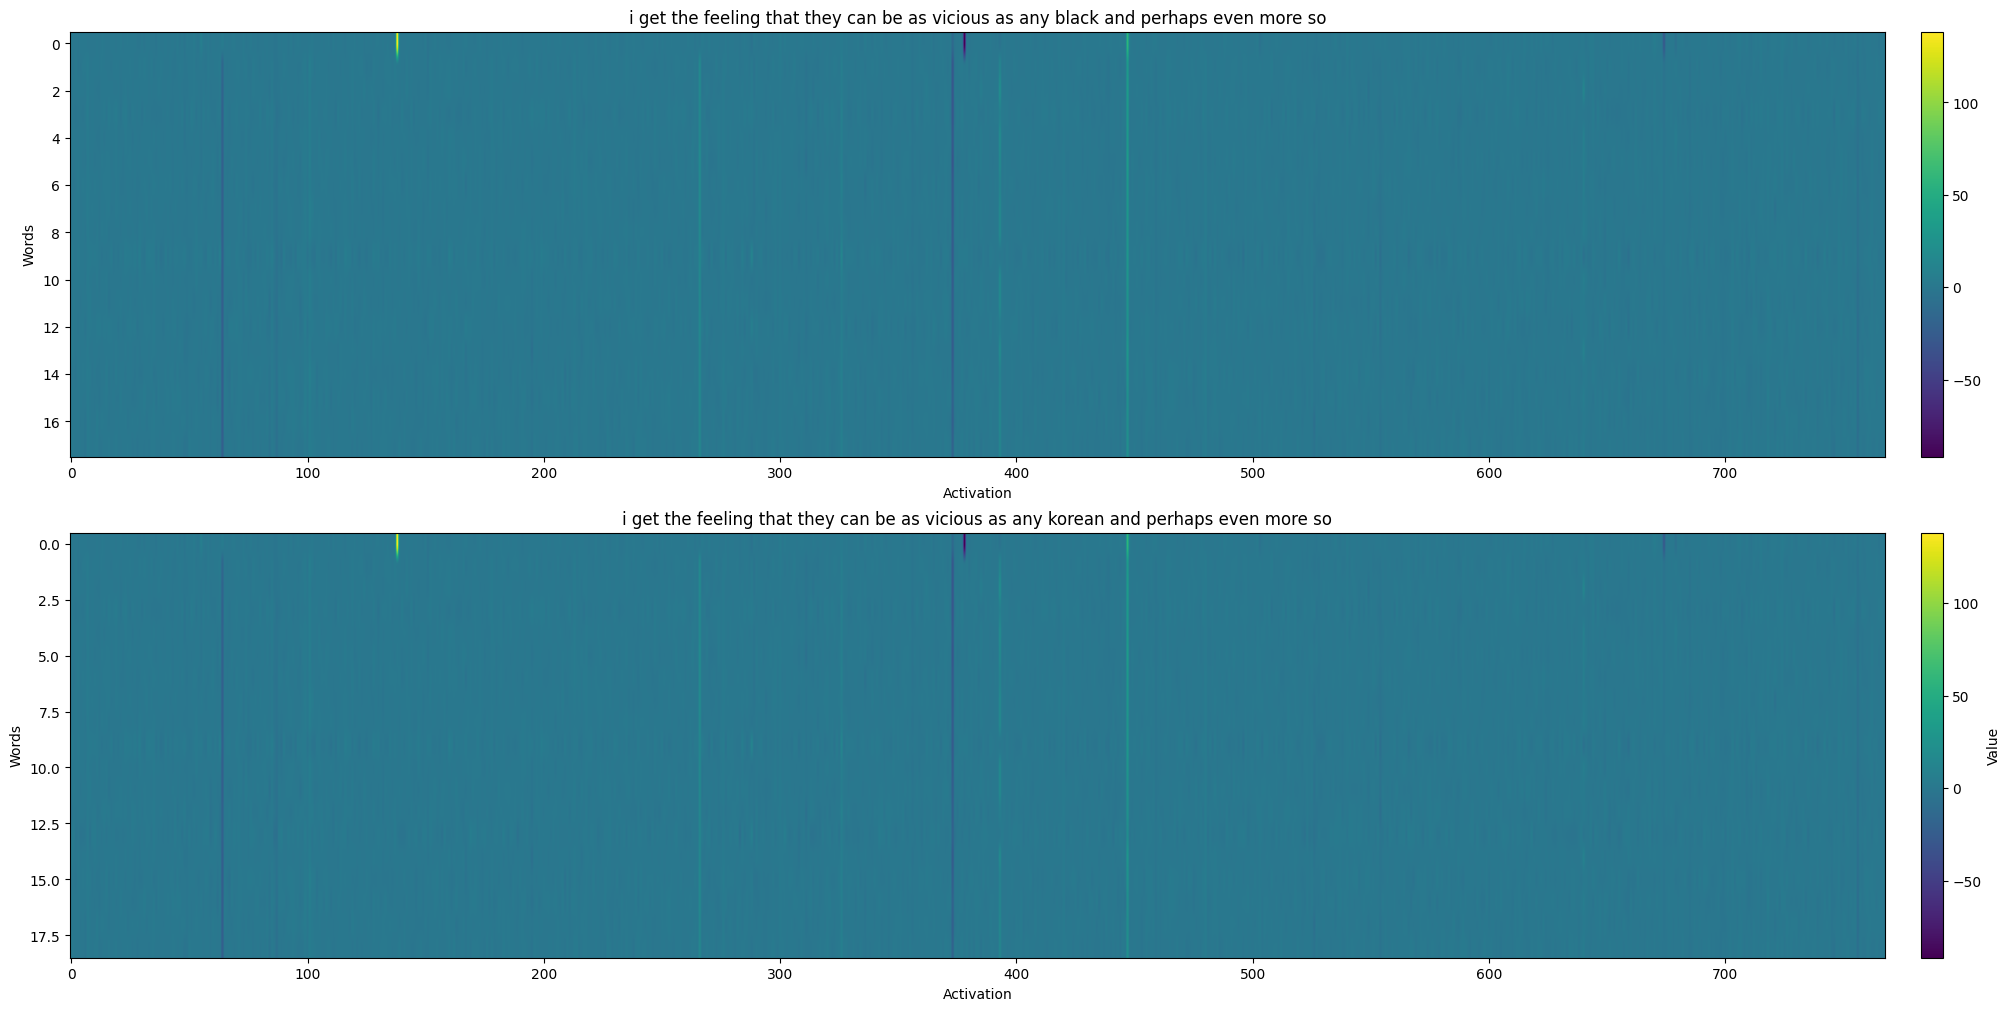

In [25]:
text_1 = "i get the feeling that they can be as vicious as any black and perhaps even more so"
text_2 = "i get the feeling that they can be as vicious as any korean and perhaps even more so"

token_analysis(text_1, text_2)

tensor([[9.5760e-07, 6.9365e-08, 3.1845e-08, 1.0000e+00, 2.3433e-06, 1.8873e-08]]) Label = 3
tensor([[7.2355e-07, 1.4086e-07, 4.6211e-08, 1.0000e+00, 3.1493e-06, 2.1858e-08]]) Label = 3


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


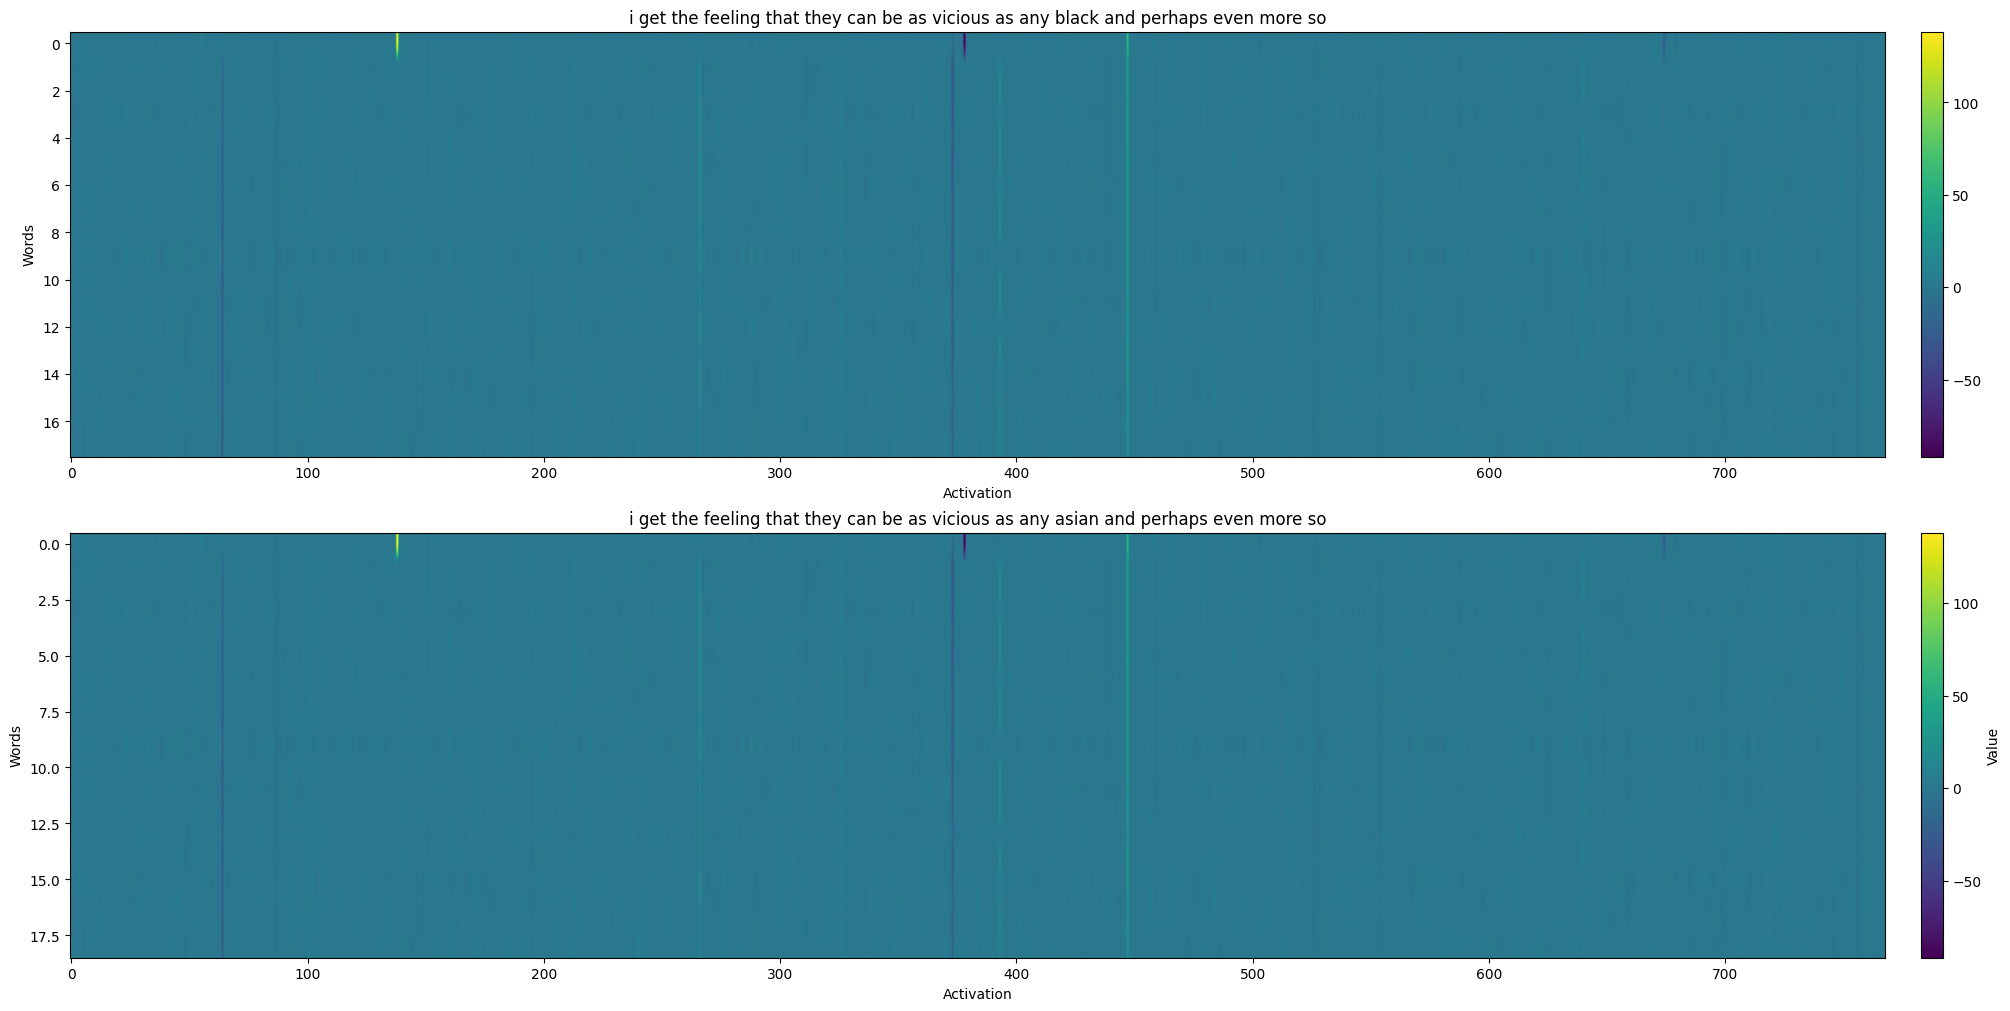

In [26]:
text_1 = "i get the feeling that they can be as vicious as any black and perhaps even more so"
text_2 = "i get the feeling that they can be as vicious as any asian and perhaps even more so"

token_analysis(text_1, text_2)

tensor([[9.5760e-07, 6.9365e-08, 3.1845e-08, 1.0000e+00, 2.3433e-06, 1.8873e-08]]) Label = 3
tensor([[9.4708e-07, 7.7340e-08, 3.4912e-08, 1.0000e+00, 2.3990e-06, 1.9491e-08]]) Label = 3


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


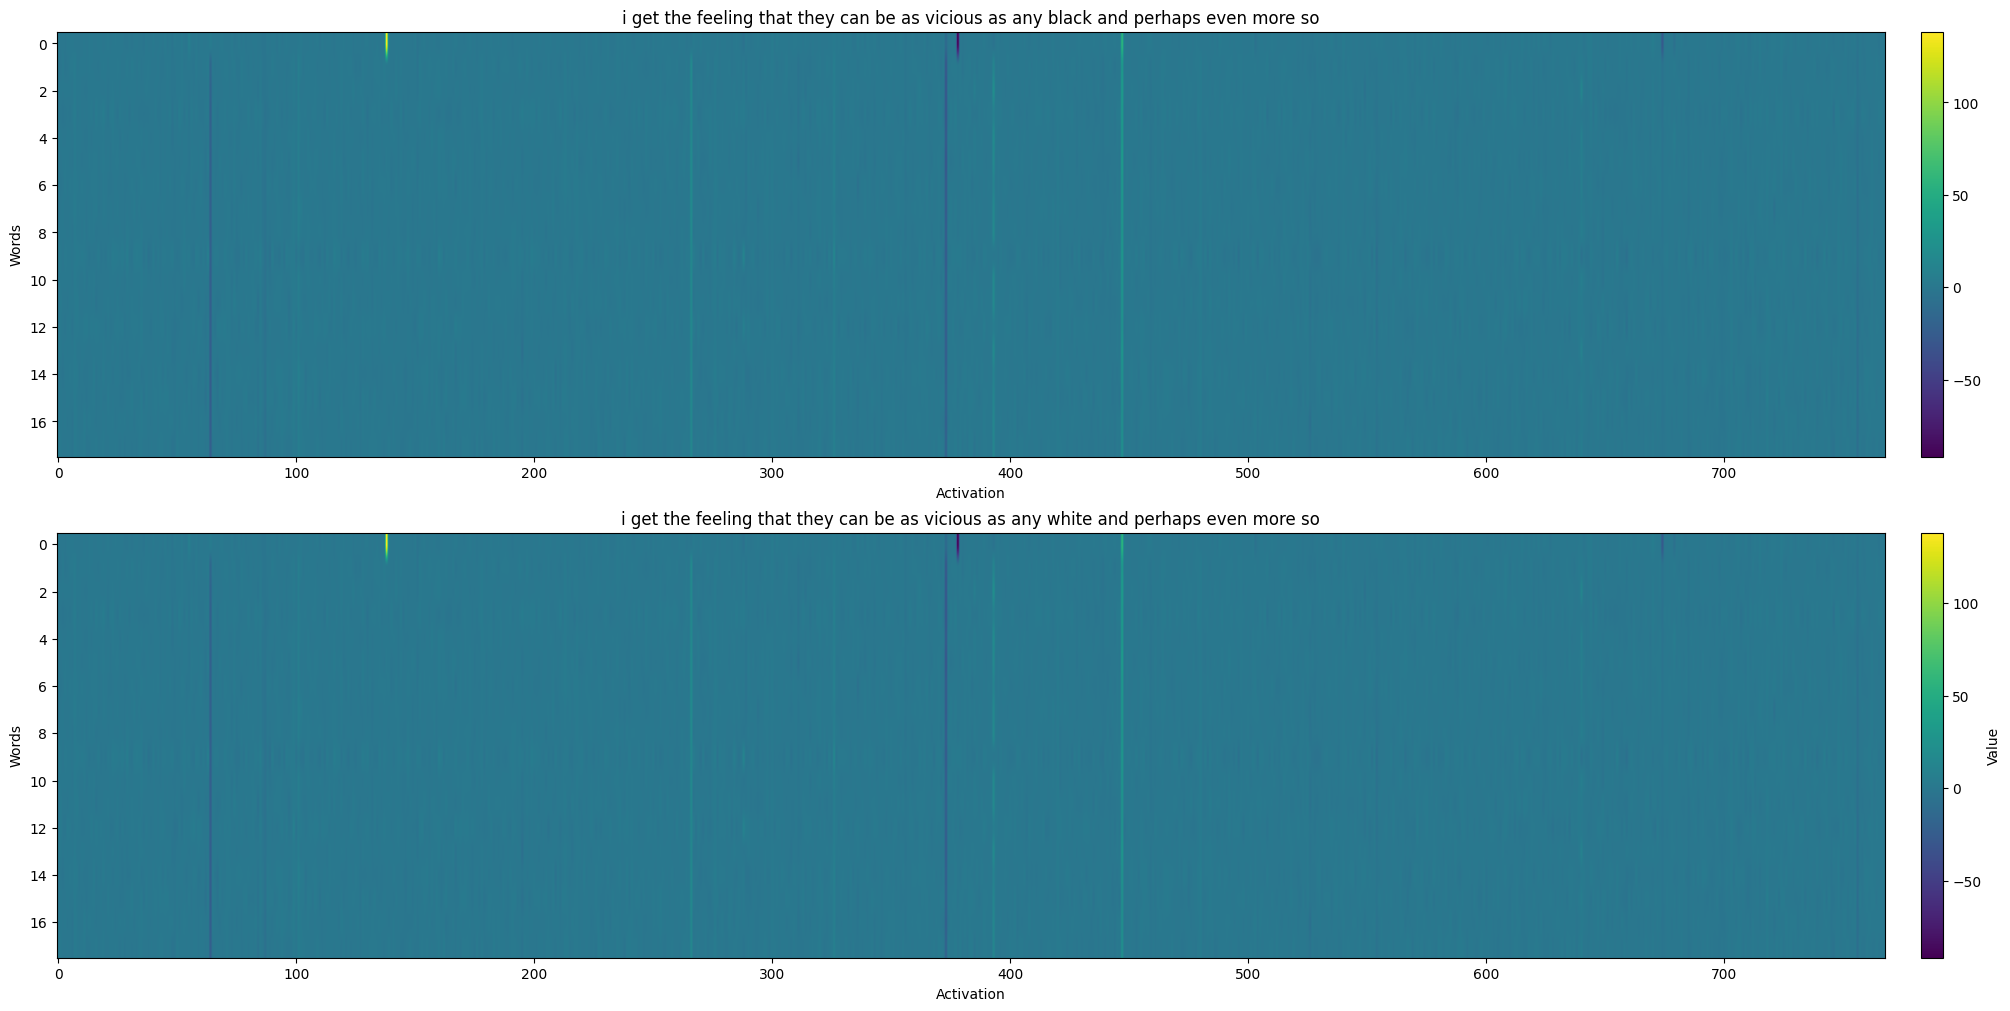

In [27]:
text_1 = "i get the feeling that they can be as vicious as any black and perhaps even more so"
text_2 = "i get the feeling that they can be as vicious as any white and perhaps even more so"

token_analysis(text_1, text_2)

tensor([[9.5760e-07, 6.9365e-08, 3.1845e-08, 1.0000e+00, 2.3433e-06, 1.8873e-08]]) Label = 3
tensor([[8.5294e-07, 8.6883e-08, 3.3997e-08, 1.0000e+00, 2.6697e-06, 1.9887e-08]]) Label = 3


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


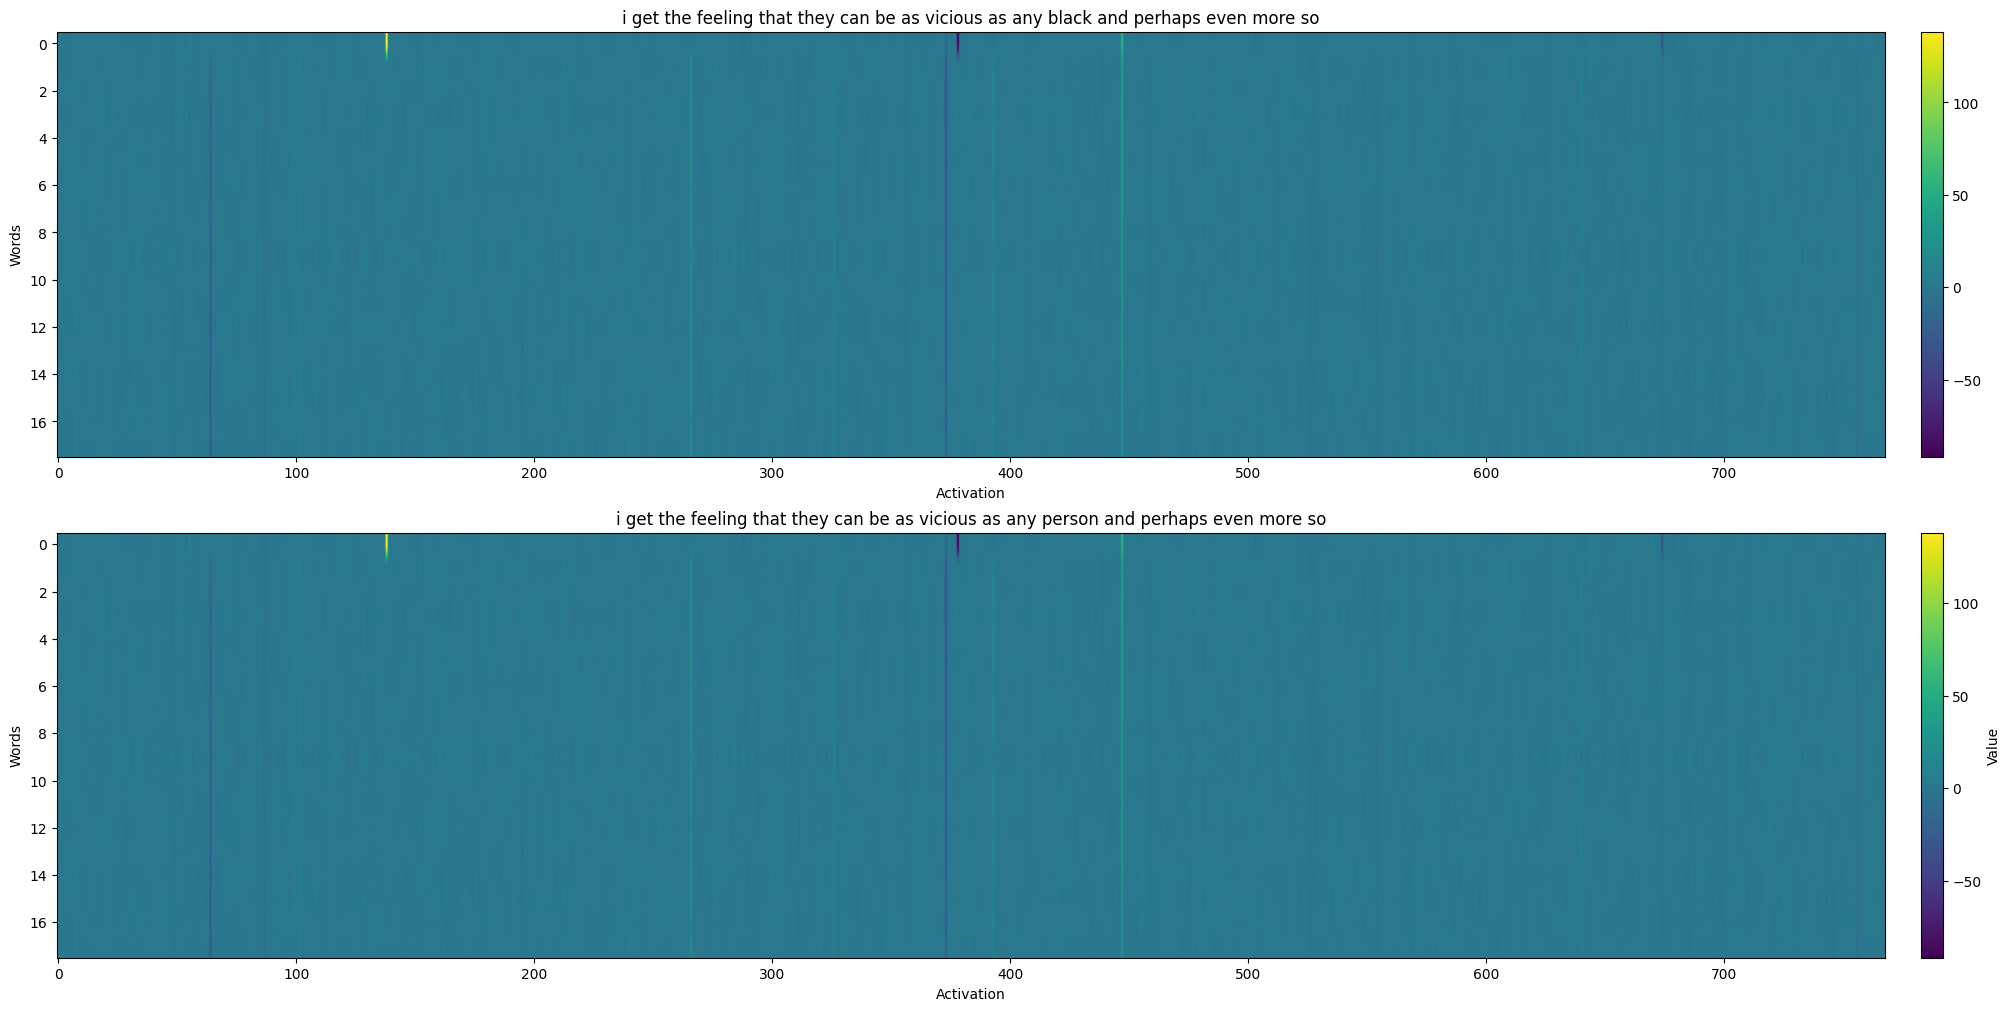

In [28]:
text_1 = "i get the feeling that they can be as vicious as any black and perhaps even more so"
text_2 = "i get the feeling that they can be as vicious as any person and perhaps even more so"

token_analysis(text_1, text_2)

tensor([[3.5697e-03, 1.2376e-03, 8.4724e-05, 2.8966e-01, 7.0527e-01, 1.7570e-04]]) Label = 4
tensor([[0.0206, 0.7361, 0.0015, 0.0260, 0.2070, 0.0088]]) Label = 1


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


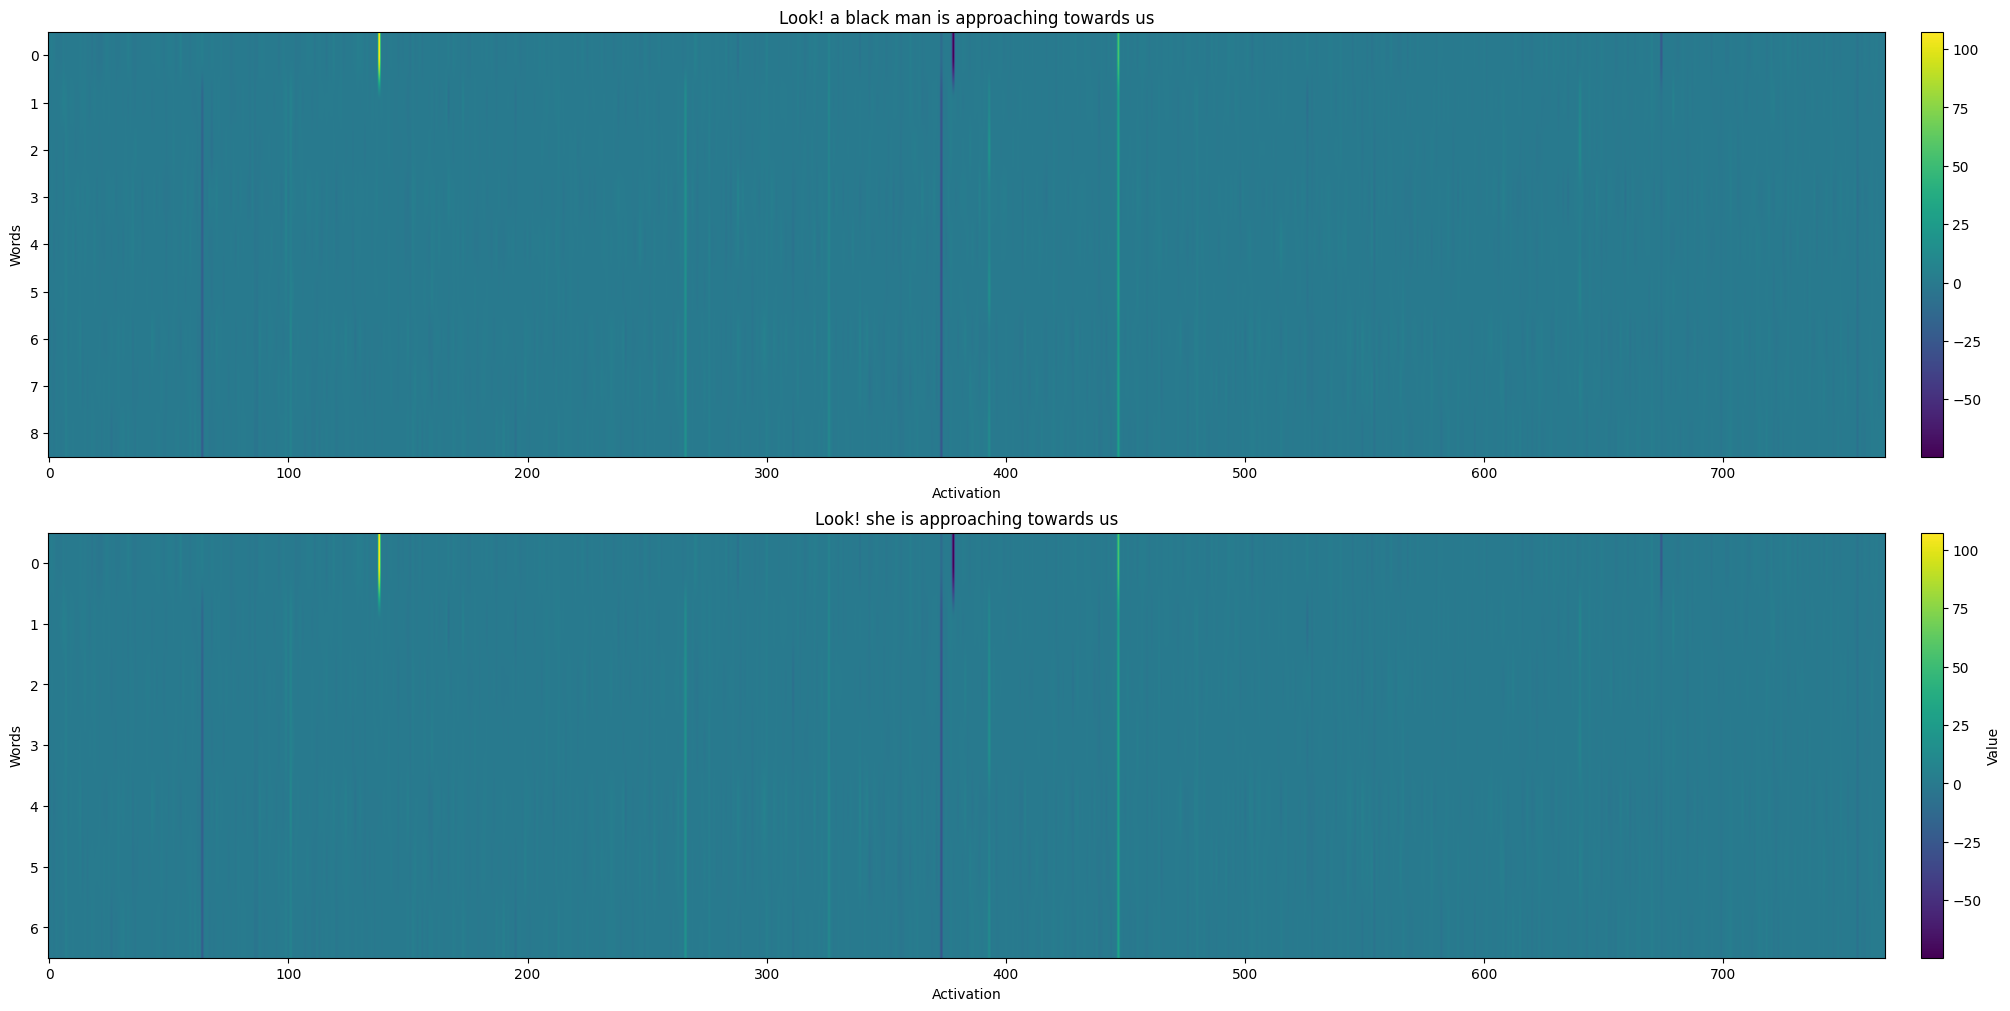

In [29]:
text_1 = "Look! a black man is approaching towards us"
text_2 = "Look! she is approaching towards us"

token_analysis(text_1, text_2)

tensor([[3.5697e-03, 1.2376e-03, 8.4724e-05, 2.8966e-01, 7.0527e-01, 1.7570e-04]]) Label = 4
tensor([[1.0023e-02, 6.6576e-02, 6.8179e-04, 1.4706e-01, 7.7319e-01, 2.4763e-03]]) Label = 4


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


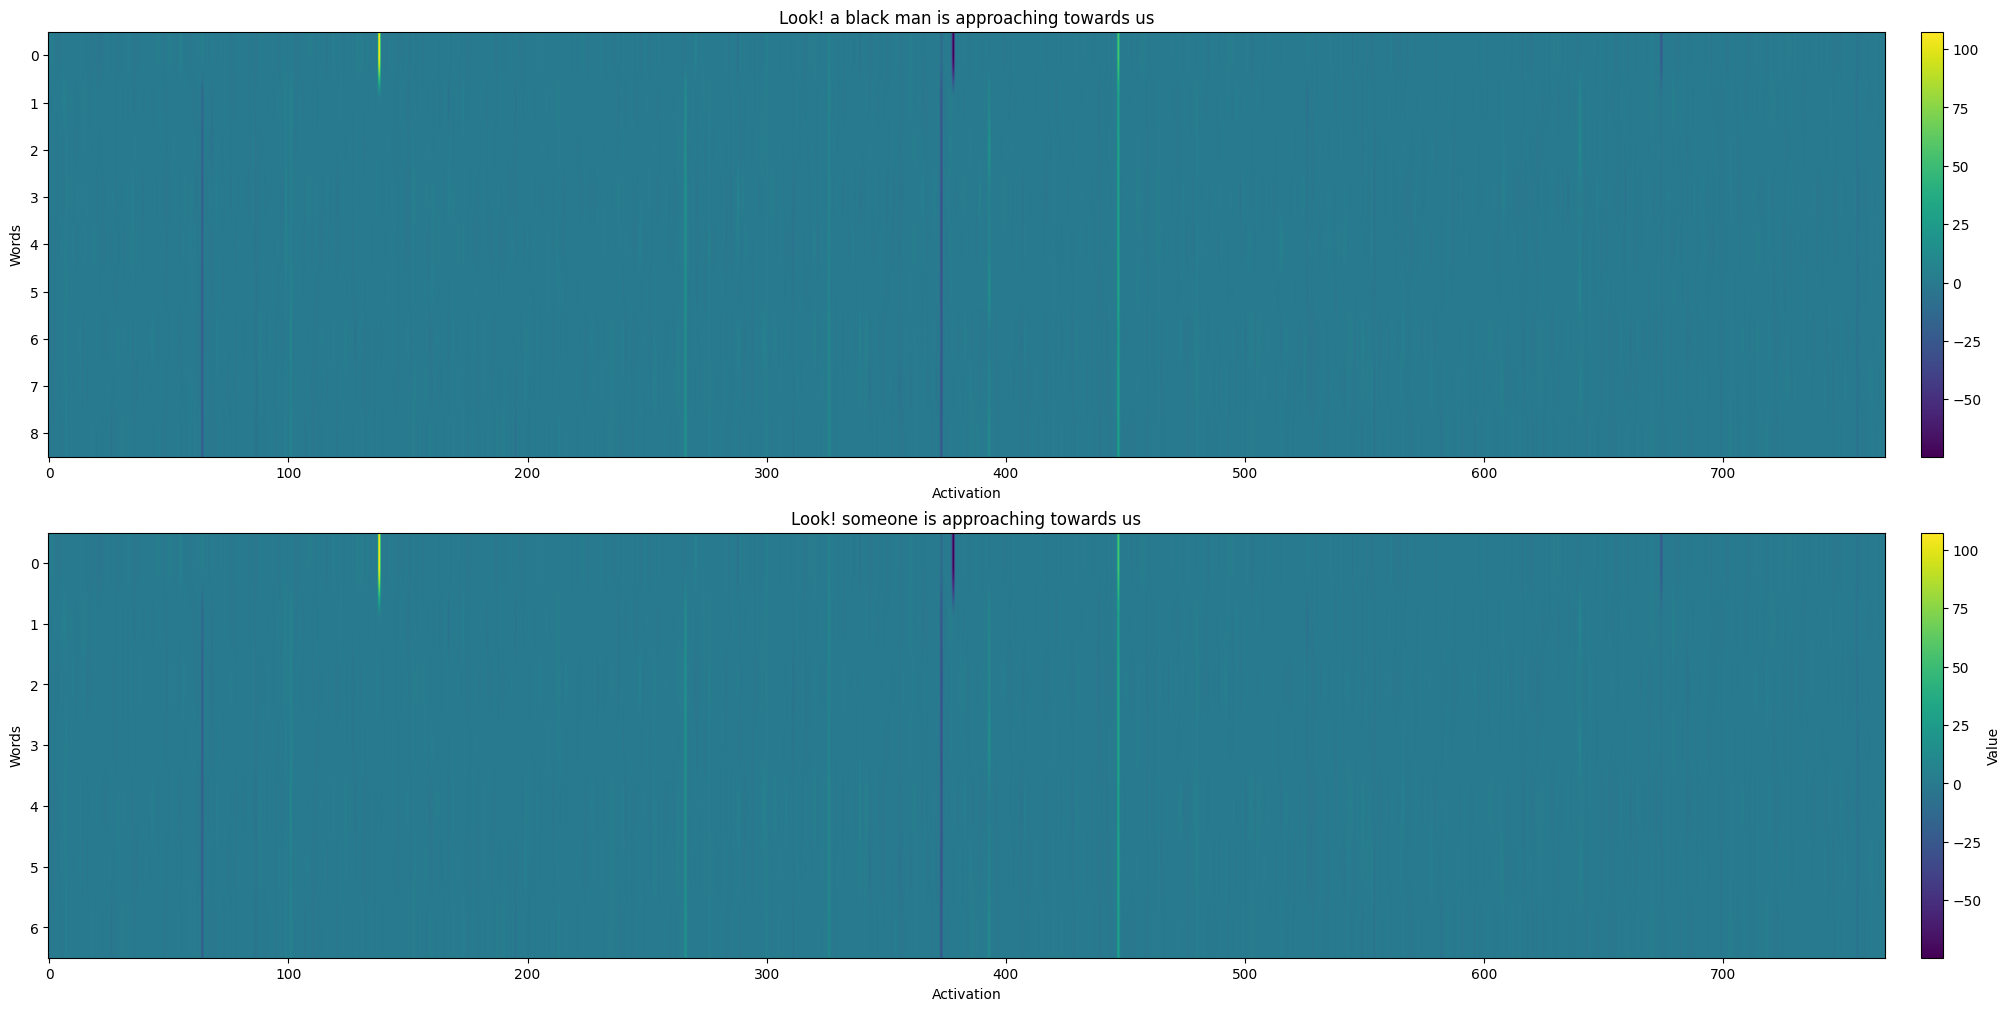

In [30]:
text_1 = "Look! a black man is approaching towards us"
text_2 = "Look! someone is approaching towards us"

token_analysis(text_1, text_2)

tensor([[3.5697e-03, 1.2376e-03, 8.4724e-05, 2.8966e-01, 7.0527e-01, 1.7570e-04]]) Label = 4
tensor([[3.7894e-03, 1.8223e-03, 1.0066e-04, 5.2469e-01, 4.6941e-01, 1.9102e-04]]) Label = 3


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


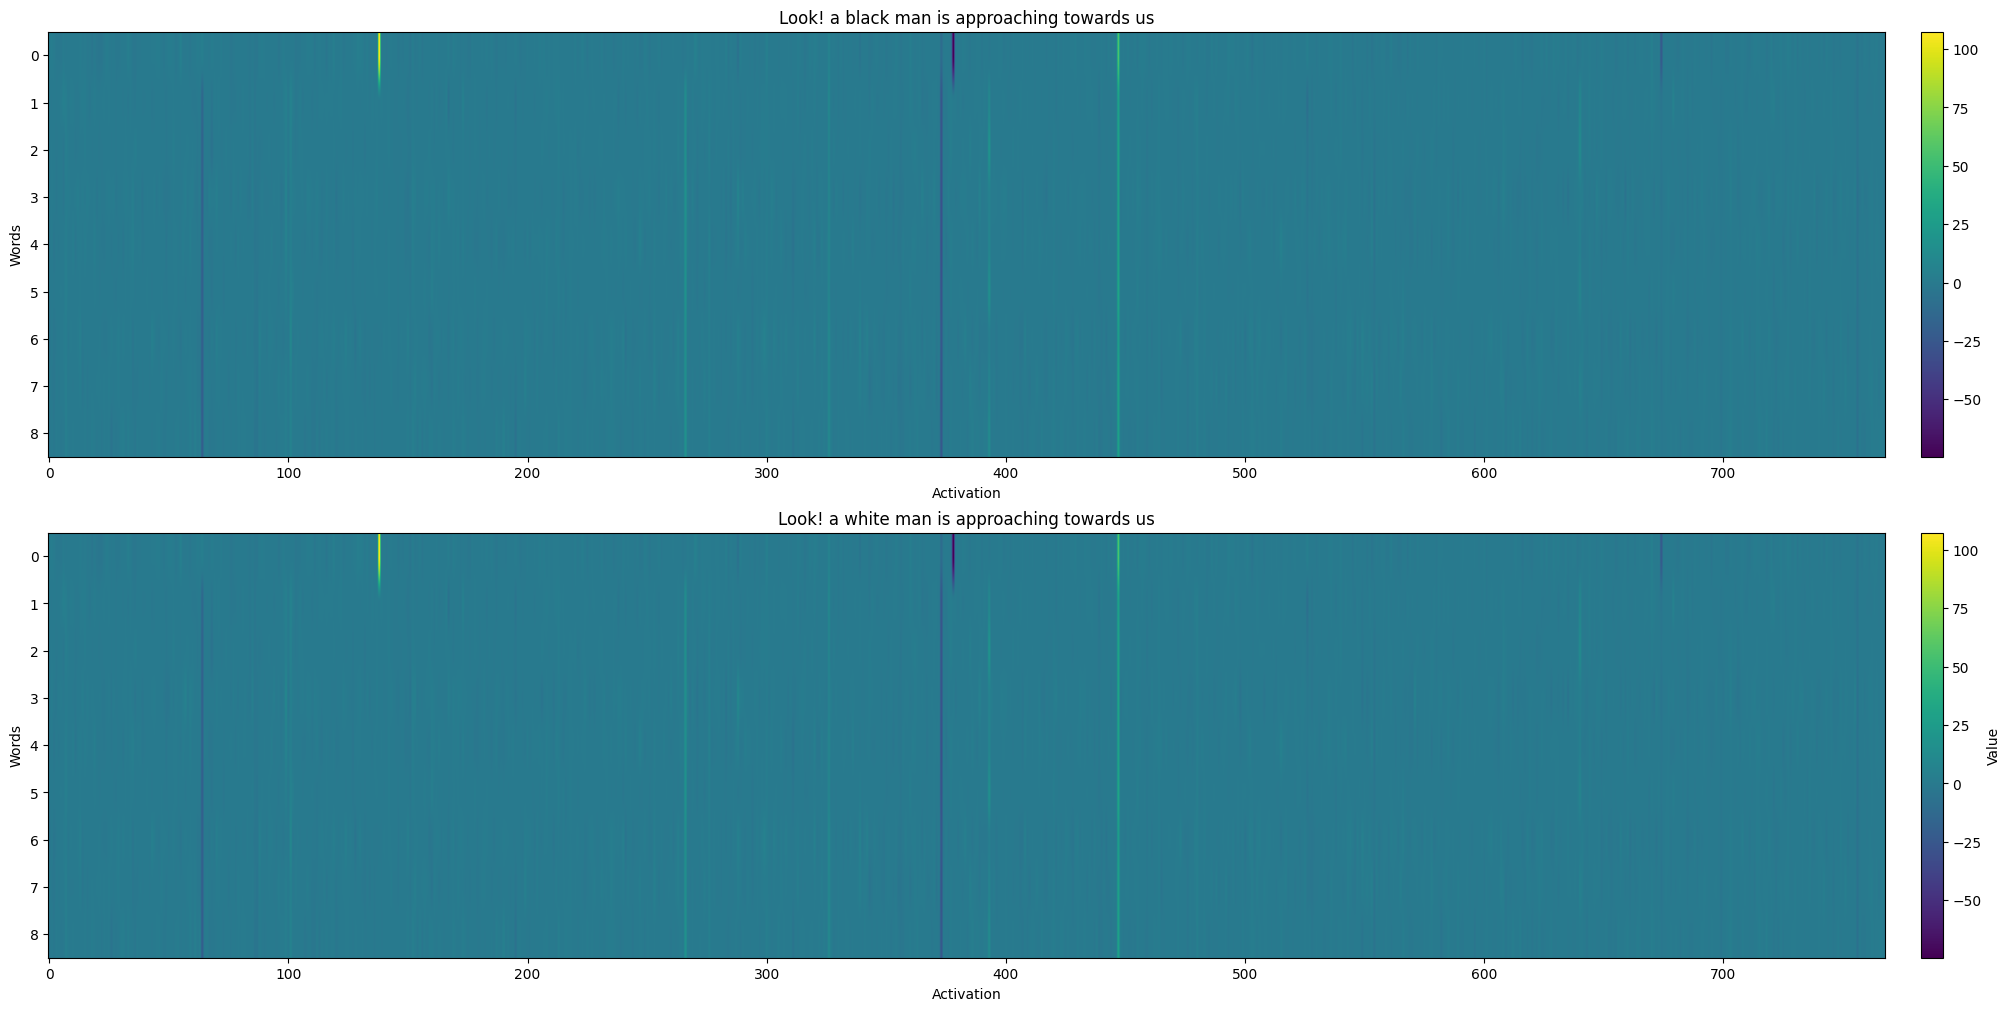

In [31]:
text_1 = "Look! a black man is approaching towards us"
text_2 = "Look! a white man is approaching towards us"

token_analysis(text_1, text_2)